## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/revenue_prediction.csv')

#### Show Top 5 Records

In [3]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=["Revenue"],axis=1)

In [5]:
X.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8
2,103,Chuy's,Yes,Chicken,Pune,25,1.9
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2


In [6]:
y = df['Revenue']

In [7]:
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(100, 130)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80, 130), (20, 130))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.8643
- Mean Absolute Error: 9.1204
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 604378.3164
- Mean Absolute Error: 486572.4628
- R2 Score: 0.7505


Lasso
Model performance for Training set
- Root Mean Squared Error: 61.7298
- Mean Absolute Error: 47.0746
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1599542.9493
- Mean Absolute Error: 1323333.5858
- R2 Score: -0.7473


Ridge
Model performance for Training set
- Root Mean Squared Error: 470363.4705
- Mean Absolute Error: 294607.2999
- R2 Score: 0.9734
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 559653.3770
- Mean Absolute Error: 438763.0696
- R2 Score: 0.7861




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1242158.8113
- Mean Absolute Error: 683106.6225
- R2 Score: 0.8145
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 707981.8089
- Mean Absolute Error: 530069.1400
- R2 Score: 0.6577


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 788739.3367
- Mean Absolute Error: 574982.7000
- R2 Score: 0.5751


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 468723.0864
- Mean Absolute Error: 219114.8330
- R2 Score: 0.9736
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 423304.1946
- Mean Absolute Error: 312991.6350
- R2 Score: 0.8776


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1336.21

### Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,AdaBoost Regressor,0.885308
5,Random Forest Regressor,0.877626
2,Ridge,0.786095
0,Linear Regression,0.750540
6,XGBRegressor,0.720289
3,K-Neighbors Regressor,0.657684
4,Decision Tree,0.575136
1,Lasso,-0.747329


## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 75.05


## Plot y_pred and y_test

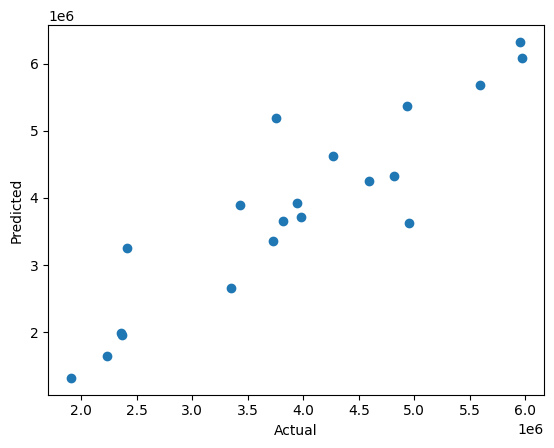

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

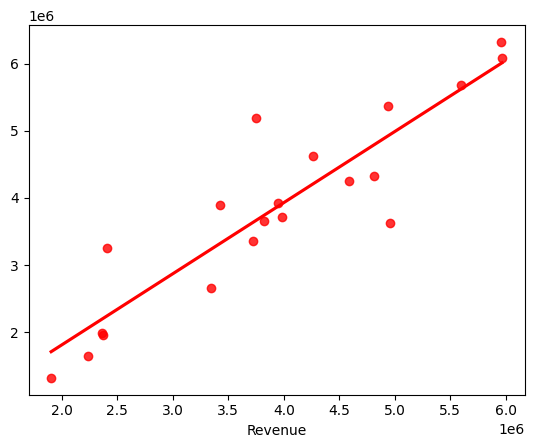

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
83,5966193,6.078736e+06,-1.125431e+05
53,5595267,5.682242e+06,-8.697457e+04
70,3982767,3.715787e+06,2.669797e+05
45,3752885,5.190840e+06,-1.437955e+06
44,4264176,4.623760e+06,-3.595840e+05
39,3818055,3.653022e+06,1.650329e+05
22,4956086,3.624868e+06,1.331218e+06
80,3727364,3.354659e+06,3.727050e+05
10,3945135,3.929194e+06,1.594147e+04
0,5953753,6.322360e+06,-3.686067e+05
